In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

# copy the .zip file into the root directory of cloud VM
!cp /content/gdrive/MyDrive/dataset.zip ../

# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../dataset.zip

'Arsitektur ANN.png'
'Arsitektur LSTM.drawio'
 Classroom
'Colab Notebooks'
 dataset
 Dataset_mutia.csv
 dataset.zip
'DDoS_LSTM_Model_53 Fitur.ipynb'
 DDoS_LSTM_Model_69_Fitur_50_50.ipynb
 hasil.zip
'koding dan hasil'
'koding ta2'
'My Drive'
'Salinan DDoS_LSTM_Model_69_Fitur_50_50.ipynb'
'Untitled Diagram (1).drawio'
'Untitled Diagram.drawio'
Archive:  ../dataset.zip
   creating: dataset/
  inflating: dataset/testdata_10.csv  
  inflating: dataset/testdata_20.csv  
  inflating: dataset/testdata_30.csv  
  inflating: dataset/testdata_40.csv  
  inflating: dataset/testdata_50.csv  
  inflating: dataset/traindata_50.csv  
  inflating: dataset/traindata_60.csv  
  inflating: dataset/traindata_70.csv  
  inflating: dataset/traindata_80.csv  
  inflating: dataset/traindata_90.csv  


In [ ]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.datasets import imdb
from keras.utils.np_utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [ ]:
traindata = pd.read_csv('dataset/traindata_80.csv')
testdata = pd.read_csv('dataset/testdata_20.csv')

In [ ]:
traindata.drop(['Unnamed: 0','Timestamp'], axis = 1, inplace=True)
testdata.drop(['Unnamed: 0','Timestamp'], axis = 1, inplace=True)

In [ ]:
traindata = traindata.replace(to_replace = ["DDOS attack-HOIC"],value = 1)
traindata = traindata.replace(to_replace = ["Benign"],value = 0)
testdata = testdata.replace(to_replace = ["DDOS attack-HOIC"],value = 1)
testdata = testdata.replace(to_replace = ["Benign"],value = 0)

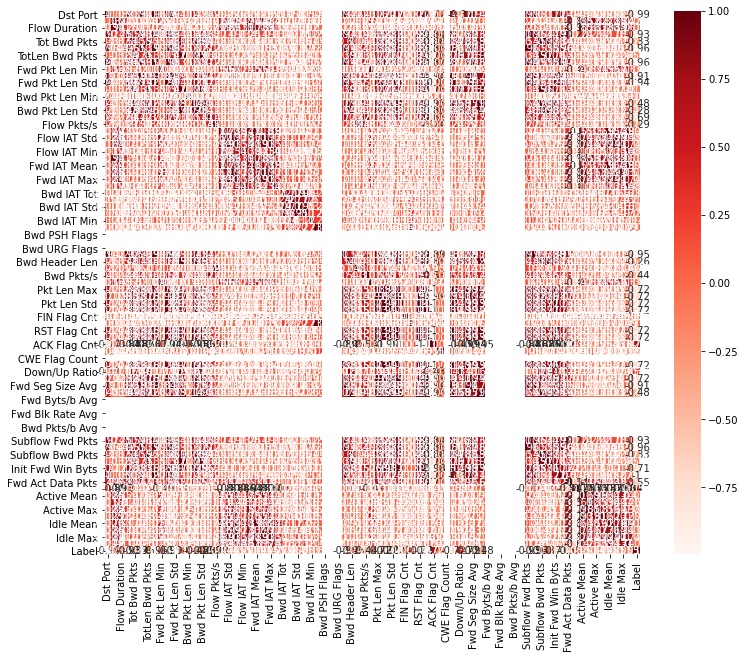

In [ ]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor1 = traindata.corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
a = abs(cor1['Label'])
result = a[a > 0.1]
result

Dst Port             0.990373
Tot Fwd Pkts         0.932724
Tot Bwd Pkts         0.332853
TotLen Fwd Pkts      0.963413
TotLen Bwd Pkts      0.109457
Fwd Pkt Len Max      0.964809
Fwd Pkt Len Mean     0.907615
Fwd Pkt Len Std      0.942592
Bwd Pkt Len Max      0.109346
Bwd Pkt Len Mean     0.477858
Bwd Pkt Len Std      0.279051
Flow Byts/s          0.687237
Flow Pkts/s          0.288454
Bwd IAT Min          0.130485
Fwd Header Len       0.948810
Bwd Header Len       0.256304
Fwd Pkts/s           0.215512
Bwd Pkts/s           0.438120
Pkt Len Max          0.718727
Pkt Len Mean         0.718462
Pkt Len Std          0.717935
Pkt Len Var          0.717859
RST Flag Cnt         0.717707
PSH Flag Cnt         0.718378
ACK Flag Cnt         0.723589
ECE Flag Cnt         0.717707
Down/Up Ratio        0.311220
Pkt Size Avg         0.718114
Fwd Seg Size Avg     0.907615
Bwd Seg Size Avg     0.477858
Subflow Fwd Pkts     0.932724
Subflow Fwd Byts     0.963413
Subflow Bwd Pkts     0.332853
Subflow Bw

In [ ]:
traindata.drop(['Protocol','Flow Byts/s','Flow Pkts/s','Pkt Len Min','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','FIN Flag Cnt','SYN Flag Cnt','URG Flag Cnt','CWE Flag Count','Flow Duration'], axis = 1, inplace=True)
testdata.drop(['Protocol','Flow Byts/s','Flow Pkts/s','Pkt Len Min','Fwd Byts/b Avg','Fwd Pkts/b Avg','Fwd Blk Rate Avg','Bwd Byts/b Avg','Bwd Pkts/b Avg','Bwd Blk Rate Avg','Fwd Seg Size Min','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min','FIN Flag Cnt','SYN Flag Cnt','URG Flag Cnt','CWE Flag Count','Flow Duration'], axis = 1, inplace=True)

In [ ]:
enc = LabelEncoder()
traindata = traindata.apply(enc.fit_transform)
testdata = testdata.apply(enc.fit_transform)

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837476 entries, 0 to 837475
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Dst Port           837476 non-null  int64
 1   Tot Fwd Pkts       837476 non-null  int64
 2   Tot Bwd Pkts       837476 non-null  int64
 3   TotLen Fwd Pkts    837476 non-null  int64
 4   TotLen Bwd Pkts    837476 non-null  int64
 5   Fwd Pkt Len Max    837476 non-null  int64
 6   Fwd Pkt Len Min    837476 non-null  int64
 7   Fwd Pkt Len Mean   837476 non-null  int64
 8   Fwd Pkt Len Std    837476 non-null  int64
 9   Bwd Pkt Len Max    837476 non-null  int64
 10  Bwd Pkt Len Min    837476 non-null  int64
 11  Bwd Pkt Len Mean   837476 non-null  int64
 12  Bwd Pkt Len Std    837476 non-null  int64
 13  Flow IAT Mean      837476 non-null  int64
 14  Flow IAT Std       837476 non-null  int64
 15  Flow IAT Max       837476 non-null  int64
 16  Flow IAT Min       837476 non-null  in

In [ ]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209368 entries, 0 to 209367
Data columns (total 55 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Dst Port           209368 non-null  int64
 1   Tot Fwd Pkts       209368 non-null  int64
 2   Tot Bwd Pkts       209368 non-null  int64
 3   TotLen Fwd Pkts    209368 non-null  int64
 4   TotLen Bwd Pkts    209368 non-null  int64
 5   Fwd Pkt Len Max    209368 non-null  int64
 6   Fwd Pkt Len Min    209368 non-null  int64
 7   Fwd Pkt Len Mean   209368 non-null  int64
 8   Fwd Pkt Len Std    209368 non-null  int64
 9   Bwd Pkt Len Max    209368 non-null  int64
 10  Bwd Pkt Len Min    209368 non-null  int64
 11  Bwd Pkt Len Mean   209368 non-null  int64
 12  Bwd Pkt Len Std    209368 non-null  int64
 13  Flow IAT Mean      209368 non-null  int64
 14  Flow IAT Std       209368 non-null  int64
 15  Flow IAT Max       209368 non-null  int64
 16  Flow IAT Min       209368 non-null  in

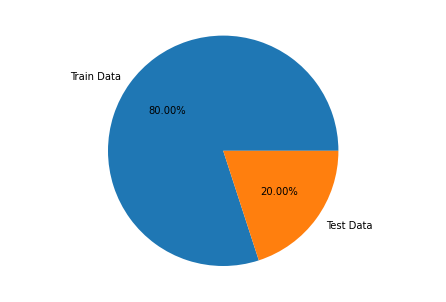

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Train Data','Test Data']
Label = [837476,209368]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
traindata.groupby('Label')['Label'].count()


Label
0    288811
1    548665
Name: Label, dtype: int64

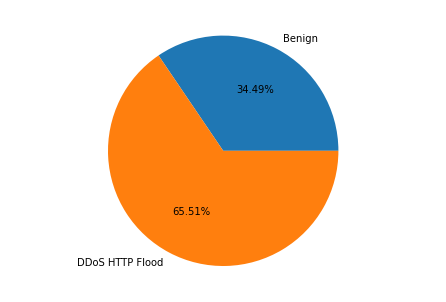

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Benign','DDoS HTTP Flood']
Label = [288811,548665]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
testdata.groupby('Label')['Label'].count()

Label
0     72021
1    137347
Name: Label, dtype: int64

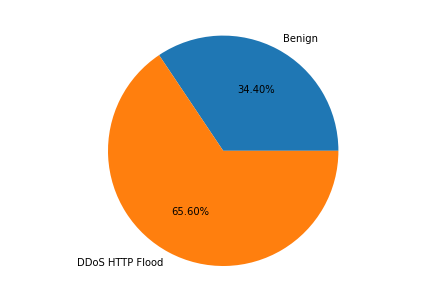

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Benign','DDoS HTTP Flood']
Label = [72021,137347]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

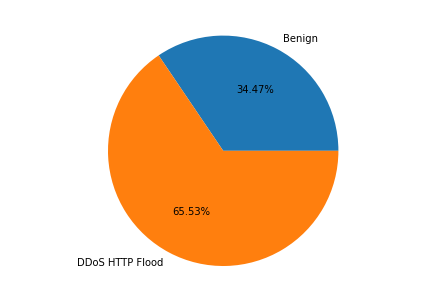

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
data = ['Benign','DDoS HTTP Flood']
Label = [360833,686012]
ax.pie(Label,labels=data,autopct='%1.2f%%')
plt.show()

In [ ]:
X = traindata.iloc[:, 0:53]
Y = traindata.iloc[:, 54]
C = testdata.iloc[:, 54]
T = testdata.iloc[:, 0:53]

In [ ]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

In [ ]:
scaler = Normalizer().fit(T)
testT = scaler.transform(T)

In [ ]:
y_train = np.array(Y)
y_test = np.array(C)

In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
X_test = np.reshape(testT, (testT.shape[0], 1, testT.shape[1]))

In [ ]:
print(X_train.shape)

(837476, 1, 53)


In [ ]:
batch_size = 64

In [ ]:
model = Sequential()
model.add(LSTM(16,input_dim=53, return_sequences=True,activation='tanh'))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(LSTM(8, return_sequences=False, activation='tanh'))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.get_config())

{'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, None, 53), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'lstm_input'}}, {'class_name': 'LSTM', 'config': {'name': 'lstm', 'trainable': True, 'batch_input_shape': (None, None, 53), 'dtype': 'float32', 'return_sequences': True, 'return_state': False, 'go_backwards': False, 'stateful': False, 'unroll': False, 'time_major': False, 'units': 16, 'activation': 'tanh', 'recurrent_activation': 'sigmoid', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'recurrent_initializer': {'class_name': 'Orthogonal', 'config': {'gain': 1.0, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'unit_forget_bias': True, 'kernel_regularizer': None, 'recurrent_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'recurrent_constraint': None, 'bias_constraint': None, 'dropou

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, None, 16)          4480      
_________________________________________________________________
dropout (Dropout)            (None, None, 16)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 5,289
Trainable params: 5,289
Non-trainable params: 0
______________________________________________________

In [ ]:
import keras
model.compile(loss='binary_crossentropy',optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics=['accuracy'])
csv_logger = CSVLogger('training_set_iranalysis.csv',separator=',', append=False)
lstm_model = model.fit(X_train, y_train, batch_size=64, epochs=100, validation_data=(X_test, y_test),callbacks=[csv_logger])
model.save("kddresults/lstm/fullmodel/lstm_model.hdf5")

Epoch 1/100
13086/13086 [==============================] - 119s 7ms/step - loss: 0.6618 - accuracy: 0.6530 - val_loss: 0.6414 - val_accuracy: 0.6560
Epoch 2/100
13086/13086 [==============================] - 87s 7ms/step - loss: 0.6409 - accuracy: 0.6556 - val_loss: 0.6374 - val_accuracy: 0.6560
Epoch 3/100
13086/13086 [==============================] - 86s 7ms/step - loss: 0.6358 - accuracy: 0.6555 - val_loss: 0.6315 - val_accuracy: 0.6560
Epoch 4/100
13086/13086 [==============================] - 89s 7ms/step - loss: 0.6278 - accuracy: 0.6552 - val_loss: 0.6204 - val_accuracy: 0.6560
Epoch 5/100
13086/13086 [==============================] - 87s 7ms/step - loss: 0.6118 - accuracy: 0.6551 - val_loss: 0.5950 - val_accuracy: 0.6560
Epoch 6/100
13086/13086 [==============================] - 88s 7ms/step - loss: 0.5741 - accuracy: 0.6559 - val_loss: 0.5327 - val_accuracy: 0.6560
Epoch 7/100
13086/13086 [==============================] - 88s 7ms/step - loss: 0.4941 - accuracy: 0.7130 - val

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %4f, Accuracy: %.4f%%" % (loss, accuracy*100))
lstm_predict = model.predict_classes(X_test)

6543/6543 [==============================] - 22s 3ms/step - loss: 0.0043 - accuracy: 0.9995

Loss: 0.004273, Accuracy: 99.9532%


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


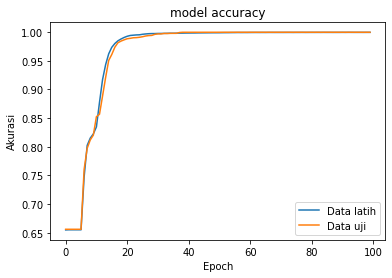

In [ ]:
plt.plot(lstm_model.history['accuracy'])
plt.plot(lstm_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['Data latih', 'Data uji'], loc='lower right')
plt.show()

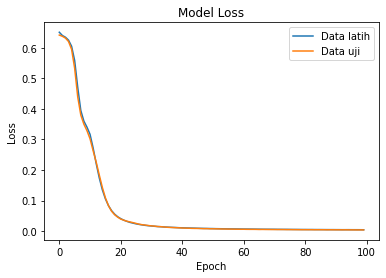

In [ ]:
plt.plot(lstm_model.history['loss'])
plt.plot(lstm_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Data latih', 'Data uji'], loc='upper right')
plt.show()

In [ ]:
cm = confusion_matrix(y_test, lstm_predict)
print(cm)
tp = cm[0,0]
tn = cm[1,1]
fp = cm[0,1]
fn = cm[1,0]

[[ 71926     95]
 [     3 137344]]


In [ ]:
precision = tp / ( tp + fp)
recall = tp/(tp+fn)
f1=(2*precision*recall)/ (precision+recall)
akurasi = (tp+tn)/(tp+tn+fp+fn)
Sensitivity = tp/(tp + fn)

In [ ]:
print ("precesion : ",precision)
print("recall : ",recall)
print ("F1 : ",f1)
print("sensitivity : ",Sensitivity )
print("akurasi : ",akurasi)

precesion :  0.9986809402813068
recall :  0.999958292204813
F1 :  0.9993192080583535
sensitivity :  0.999958292204813
akurasi :  0.9995319246494211


<function matplotlib.pyplot.show>

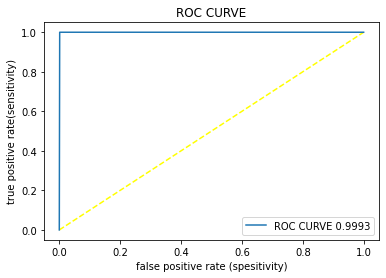

In [ ]:
import keras
import seaborn as sns
from sklearn.metrics import roc_curve, auc

fpr_keras,tpr_keras, threshold =roc_curve(y_test, lstm_predict)
auc=auc(fpr_keras,tpr_keras)

plt.figure(1)
plt.plot([0,1],[0,1],'k--',color='yellow')
plt.plot(fpr_keras, tpr_keras, label="ROC CURVE {0:.4f}".format(auc))
plt.xlabel('false positive rate (spesitivity)')
plt.ylabel('true positive rate(sensitivity)')
plt.title('ROC CURVE')
plt.legend(loc='best')
plt.show

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, lstm_predict)

print('Average precision-recall score: {0:0.8f}'.format(
      average_precision))

Average precision-recall score: 0.99930129


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99930129')

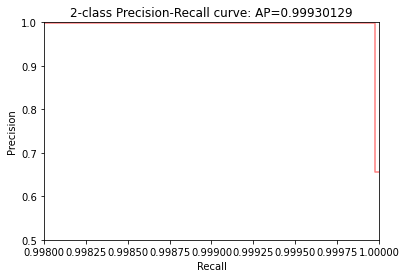

In [ ]:
from inspect import signature
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, lstm_predict)
average_precision = average_precision_score(y_test, lstm_predict)
step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.5, where='post')
plt.fill_between(recall, precision, alpha=0.5, color='w', **step_kwargs)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.5000, 1.0000])
plt.xlim([0.9980, 1.0000])
plt.title('2-class Precision-Recall curve: AP={0:0.8f}'.format(average_precision))

In [ ]:
lstm_predict

array([[1],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
import pandas as pd
import numpy as np
lstm_predict.shape

(209368, 1)

In [ ]:
type(lstm_predict)

numpy.ndarray

In [ ]:
dataset = pd.DataFrame()
dataset['lstm_predict'] = lstm_predict.tolist()

In [ ]:
dataset.head()

,lstm_predict
0,[1]
1,[0]
2,[0]
3,[0]
4,[1]


In [ ]:
hasil = pd.concat([testdata,dataset], axis=1)

In [ ]:
hasil.to_csv(r'validasi_80_20.csv')

In [ ]:
hasil = pd.read_csv('validasi_80_20.csv')

In [ ]:
data = hasil.replace(to_replace = ["[1]"],value = 1)
data = data.replace(to_replace = ["[0]"],value = 0)

In [ ]:
data.head(20)

,Unnamed: 0,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
0,0,3,2,4,43,50,41,0,44,45,50,0,55,54,7185,61387,6555,3,6771,10229,55072,6567,211,7477,5981,11064,6381,17,0,0,0,0,10,6,36000,21697,7,50,50,50,1,1,0,1,1,69,44,55,2,43,4,50,23,4,1,1,1
1,1,278,4,2,72,34,62,0,62,65,33,0,37,33,2222,51011,2181,2,2686,2226,44367,2486,3,2269,5040,0,2246,2257,0,0,0,0,20,3,47592,23803,7,50,50,50,1,1,0,1,0,69,62,37,4,72,2,34,23,14,1,0,0
2,2,8100,4,2,72,12,62,0,62,65,11,0,13,11,855,45456,842,6,1299,867,39935,1156,7,950,1921,0,950,1015,0,0,0,0,20,3,49731,25999,7,26,26,26,1,1,0,1,0,44,62,13,4,72,2,12,23,14,1,0,0
3,3,424,4,2,72,11,62,0,62,65,10,0,12,10,2732,49582,1643,7,3241,2725,41948,1653,8,1029,2062,0,1029,1093,0,0,0,0,20,3,46832,22791,7,25,25,25,1,1,0,1,0,43,62,12,4,72,2,11,23,14,1,0,0
4,4,3,2,4,44,50,42,0,45,46,50,0,55,54,11690,75625,12368,7,12797,18848,70405,12393,428,11829,10251,24119,11892,18,0,0,0,0,10,6,25730,17346,7,51,51,51,1,1,0,1,1,70,45,55,2,44,4,50,23,4,1,1,1
5,5,859,4,2,72,15,62,0,62,65,14,0,17,14,22966,100369,27399,6,27315,21949,79784,27233,7,21264,27026,0,20194,13924,0,0,0,0,20,3,18867,2292,7,29,29,29,1,1,0,1,0,47,62,17,4,72,2,15,23,14,1,0,0
6,6,15436,4,2,72,44,62,0,62,65,43,0,47,44,569,29122,528,4,1013,581,27425,866,5,636,1346,0,636,701,0,0,0,0,20,3,50080,26389,7,60,60,60,1,1,0,1,0,79,62,47,4,72,2,44,23,14,1,0,0
7,7,3,2,4,31,50,29,0,31,30,50,0,55,54,14149,82319,14329,3,14581,20656,75920,14351,244,14325,12368,27229,13651,20,0,0,0,0,10,6,22555,15101,7,38,38,38,1,1,0,1,1,56,31,55,2,31,4,50,23,4,1,1,1
8,8,4875,4,2,72,30,62,0,62,65,29,0,33,29,10047,71461,10569,6,11265,8720,56777,10875,7,9554,19376,0,9791,7095,0,0,0,0,20,3,38040,10998,7,46,46,46,1,1,0,1,0,65,62,33,4,72,2,30,23,14,1,0,0
9,9,3,2,4,25,50,23,0,25,24,50,0,55,54,13147,72816,11458,3,12491,18546,62685,11482,1040,13309,11503,21261,11602,17,0,0,0,0,10,6,23792,16022,7,32,32,32,1,1,0,1,1,50,25,55,2,25,4,50,23,4,1,1,1


In [ ]:
data_attack = data[data["Label"]==1]
data_normal = data[data["Label"]==0]

In [ ]:
attack_error = data_attack[data_attack.loc[:,"Label"] != data_attack.loc[:,"lstm_predict"]]
normal_error = data_normal[data_normal.loc[:,"Label"] != data_normal.loc[:,"lstm_predict"]]

In [ ]:
attack_error

,Unnamed: 0,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
46372,46372,3,2,4,15,50,13,0,15,13,50,0,55,54,834,44497,630,2,599,1042,36729,648,28,1446,786,545,770,16,0,0,0,0,10,6,48159,27259,7,22,22,22,1,1,0,1,1,40,15,55,2,15,4,50,23,4,1,1,0
161719,161719,3,2,4,19,50,17,0,19,18,50,0,55,54,608,46139,865,1,803,1447,41177,879,2,1224,564,3573,983,25,0,0,0,0,10,6,48745,27485,7,26,26,26,1,1,0,1,1,44,19,55,2,19,4,50,23,4,1,1,0
168201,168201,3,2,4,59,50,55,0,59,60,50,0,55,54,1702,45901,766,1,973,1779,25929,776,203,2302,1483,1224,1160,275,0,0,0,0,10,6,46218,26505,7,65,65,65,1,1,0,1,1,83,59,55,2,59,4,50,23,4,1,1,0


In [ ]:
normal_error.head(20)

,Unnamed: 0,Dst Port,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,Bwd Pkt Len Min,Bwd Pkt Len Mean,Bwd Pkt Len Std,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Tot,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Tot,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Fwd Pkts/s,Bwd Pkts/s,Pkt Len Max,Pkt Len Mean,Pkt Len Std,Pkt Len Var,RST Flag Cnt,PSH Flag Cnt,ACK Flag Cnt,ECE Flag Cnt,Down/Up Ratio,Pkt Size Avg,Fwd Seg Size Avg,Bwd Seg Size Avg,Subflow Fwd Pkts,Subflow Fwd Byts,Subflow Bwd Pkts,Subflow Bwd Byts,Init Fwd Win Byts,Init Bwd Win Byts,Fwd Act Data Pkts,Label,lstm_predict
4536,4536,106,4,2,72,29,62,0,62,65,28,0,31,28,346,763,257,9,790,358,1277,575,10,365,635,0,365,430,0,0,0,0,20,3,50352,26738,7,45,45,45,1,1,0,1,0,64,62,31,4,72,2,29,23,14,1,0,1
4723,4723,636,4,2,72,48,62,0,62,65,47,0,53,49,78,52,93,8,490,79,363,298,10,99,99,0,99,156,0,0,0,0,20,3,50661,27281,7,65,65,65,1,1,0,1,0,83,62,53,4,72,2,48,23,14,1,0,1
11487,11487,508,4,2,72,30,62,0,62,65,29,0,33,29,257,406,135,3,701,269,782,408,4,181,185,0,181,244,0,0,0,0,20,3,50457,26882,7,46,46,46,1,1,0,1,0,65,62,33,4,72,2,30,23,14,1,0,1
12646,12646,18,1,1,0,0,0,0,0,0,0,0,0,0,39549,102897,29723,19,29472,41892,0,29400,25323,0,0,0,0,0,0,0,0,0,5,1,585,37,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,8,1,0,0,1
12980,12980,5,0,1,0,0,0,0,0,0,0,0,0,0,15,0,15,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,50748,27834,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,11,1,0,0,1
17423,17423,1,4,7,72,55,60,0,62,64,51,0,57,55,45797,102922,30503,15,30341,42067,82235,30211,25478,24348,29207,32508,22525,4892,0,0,0,0,27,13,404,6,8,67,66,66,0,1,0,0,1,85,62,57,4,72,7,55,18,6,3,0,1
17730,17730,7,0,1,0,0,0,0,0,0,0,0,0,0,14,0,14,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,50750,27835,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,23,1,0,0,1
18706,18706,2,0,1,0,0,0,0,0,0,0,0,0,0,14,0,14,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,50750,27835,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,15,1,0,0,1
21028,21028,1,14,8,74,53,60,0,6,34,51,0,51,51,45794,102924,30508,3,30343,42064,82237,30216,5,24349,29205,32510,22527,44,0,0,0,0,33,14,405,7,8,7,7,7,0,1,0,0,0,25,6,51,14,74,8,53,18,6,7,0,1
23113,23113,23,0,1,0,0,0,0,0,0,0,0,0,0,15,0,15,19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,50748,27834,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,23,1,0,0,1
